# Sheet 5 Exercise 2: Linear Neural Field (Credits: 4)
Note: All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Consider a linear neural field given by the equation
$$
    \tau\dot{u}(x,t) = -u(x,t) + \int_{-\infty}^\infty w(x-x^\prime) u(x^\prime,t)\text{d}x^\prime + s(x,t),
$$
for $x, t\in\mathbb{R}$.

#### 2.1
Assume that the input signal is constant and given by
$$
s(x) = \frac{1}{2\sqrt{\pi}d}\exp\left(-\frac{x^2}{4d^2}\right).
$$
Assume further that the interaction kernel is given by the Gabor function
$$
w(x) = \frac{1}{\sqrt{\pi}b} a\left( \exp\left( -\frac{x^2}{4b^2} \right) \cos(k_0 x) \right).
$$
Derive an equation for the stationary solution of the system.

*Hint:* Assume that the system has a stable solution that does not depend on time.

#### 2.2
Solve the resulting equation from 2.1 for the stationary solution $u^\ast (x)$ using the Fourier transform.

*Hint:* The Fourier transform of the Gaussian function $f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left( - \frac{x^2}{2\sigma^2} \right)$ is given by 
$$
\tilde{f}(k) = \mathcal{F}[f](k) = \exp\left( -\frac{\sigma^2 k^2 }{2} \right).
$$
You can use this identity to find the Fourier transforms of both $s$ and $w$. First, think about how you have to define $\sigma$ in $f$ to get $s$ into the Gaussian form. Then for $w$, use the identity $\cos(x) = \frac{1}{2}(e^{ix}+e^{-ix})$. Then you can use the time-shift property of the Fourier transform to get rid of the exponentials. You will be left with another Gauss-like term that you can treat similarly to $s$ to find its transform.

The time-shift property states that $\mathcal{F}[f(x)\exp(i k_0 x)](k) = \tilde{f}(k-k_0)$.

The solution has a closed form in the frequency domain.


#### 2.3
What do you predict to happen in the x-domain if the parameter a is approaching 1 from below? Only consider the cases $b >> d$ and $d >> b$.

*Hint:* Think about what happens for very small $k$ and for $k$ close to $\pm k_0$. You can use the inverse Fourier transform in the regions around these points to get approximate solutions in the $x$-domain.

You can again use the Fourier transform of the Gaussian, and the fact that $\mathcal{F}[\delta(x)](k)=1$.

#### 2.4
Simulate the equation to find and plot the stationary solution by performing an Euler approximation, and replacing the integral by a Riemann sum s.t. $\int_A^B f(x)\text{d}x \approx \sum_{i=0}^n f(x_i)\Delta x$ with $x_i = A + i\Delta x$ and $\Delta x = \tfrac{B-A}{n}$.

Use the parameters $A=-10$, $B=10$, $n=300$, $\tau=10$, $a=1$, $b=0.6$, $d=2$, $k_0 = 4$. What do you observe? 

Then add some Gaussian noise to the input function $s$ by adding independent normals with variance $\sigma^2 = 0.01^2$ to each discretized point. What changes in the simulation? 

Finally, set $b=4$ and $d=0.2$. Plot the stationary solution for $k_0=4$ and $k_0=8$.

Can you relate the findings to 2.3?

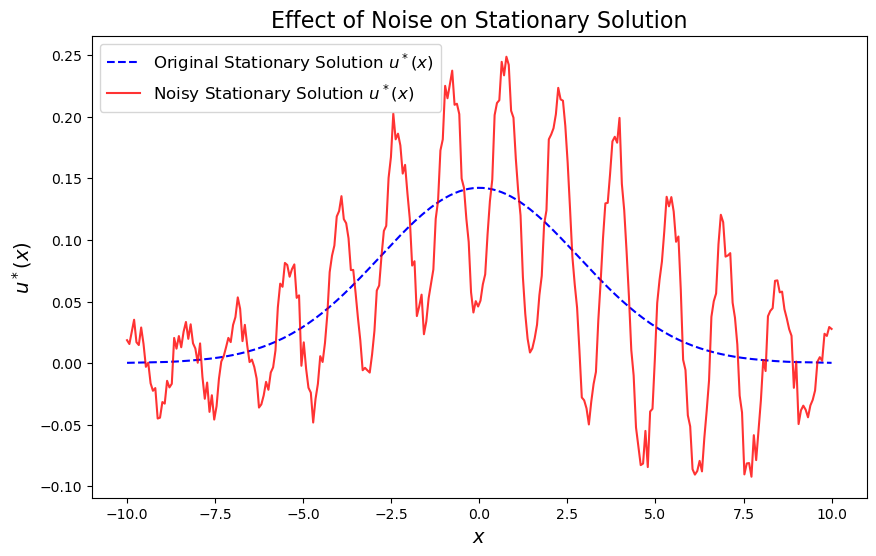

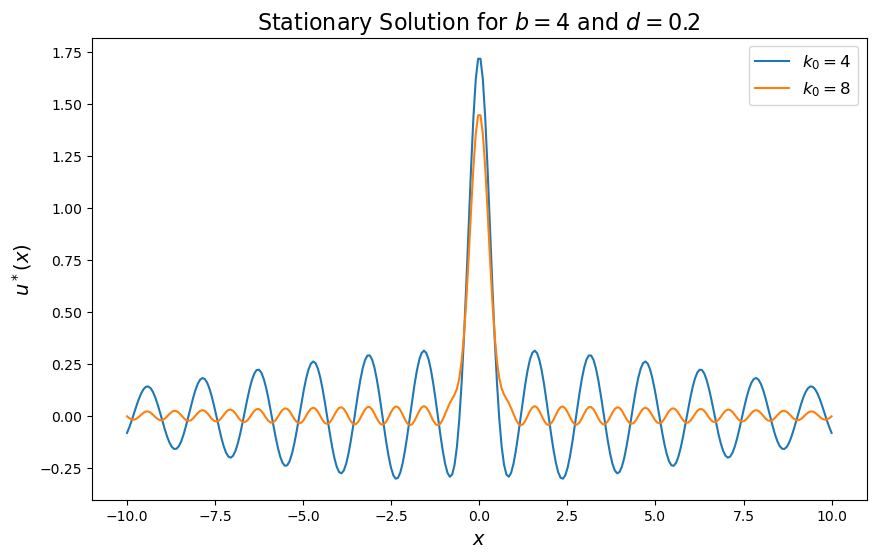

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### YOUR CODE HERE ###
# Parameters
A, B = -10, 10  # Spatial domain
n = 300  # Number of points
tau = 10  # Time constant
a, b, d, k0 = 1, 0.6, 2, 4  # Model parameters
dt = 0.1  # Time step
max_iter = 10000  # Maximum number of iterations
tol = 1e-6  # Convergence tolerance

# Discretization
x = np.linspace(A, B, n)
dx = (B - A) / n

# Define the kernel function
def w(x, a, b, k0):
    return (1 / (np.sqrt(np.pi) * b)) * a * np.exp(-x**2 / (4 * b**2)) * np.cos(k0 * x)

# Define the input signal s(x) (Gaussian function)
def s_function(x, d):
    return (1 / (2 * np.sqrt(np.pi) * d)) * np.exp(-x**2 / (4 * d**2))

# Add Gaussian noise to the input signal
def add_noise_to_signal(x, d, sigma=0.01):
    np.random.seed(42)  # For reproducibility
    return s_function(x, d) + np.random.normal(0, sigma, size=n)

# Compute stationary solution with optional noise
def compute_stationary_solution(k0, b, d, s_noisy=None):
    # Compute kernel matrix
    W = np.zeros((n, n))
    for i in range(n):
        W[i, :] = w(x[i] - x, a, b, k0)

    # Compute input signal (s_noisy is used if provided)
    s = s_function(x, d) if s_noisy is None else s_noisy

    # Initialize u(x, t)
    u = np.zeros_like(x)

    # Euler approximation
    for _ in range(max_iter):
        u_prev = u.copy()
        interaction_term = dx * np.dot(W, u)  # Riemann sum approximation
        u = u + (dt / tau) * (-u + interaction_term + s)
        if np.max(np.abs(u - u_prev)) < tol:  # Check for convergence
            break

    return u

# Plot for different scenarios
def plot_stationary_solutions(k0_values, b, d, s_noisy=None):
    plt.figure(figsize=(10, 6))
    for k0 in k0_values:
        u_result = compute_stationary_solution(k0, b, d, s_noisy)
        label = f"$k_0={k0}$" if s_noisy is None else f"$k_0={k0}$ (Noisy)"
        plt.plot(x, u_result, label=label)
    
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$u^*(x)$", fontsize=14)
    plt.title(f"Stationary Solution for $b={b}$ and $d={d}$", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(False)
    plt.show()

# Plot effect of noise on stationary solution
def plot_noise_effect(k0, b, d):
    # Compute stationary solution WITHOUT noise
    u_original = compute_stationary_solution(k0, b, d)

    # Add Gaussian noise to s(x)
    s_noisy = add_noise_to_signal(x, d)

    # Compute stationary solution WITH noise
    u_noisy = compute_stationary_solution(k0, b, d, s_noisy=s_noisy)

    # Plot both solutions
    plt.figure(figsize=(10, 6))
    plt.plot(x, u_original, label="Original Stationary Solution $u^*(x)$", linestyle="--", color="blue")
    plt.plot(x, u_noisy, label="Noisy Stationary Solution $u^*(x)$", alpha=0.8, color="red")
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$u^*(x)$", fontsize=14)
    plt.title("Effect of Noise on Stationary Solution", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(False)
    plt.show()


# Plot the effect of noise on the stationary solution for a specific case
plot_noise_effect(k0=4, b=0.6, d=2)

### YOUR CODE HERE ###

# Plot stationary solutions for k0=4 and k0=8
plot_stationary_solutions(k0_values=[4, 8], b=4, d=0.2)


**Observations:** 

<div class="alert alert-block alert-success">
    
1. **Without Noise:** The solution is smooth and symmetric, as \( s(x) \) is Gaussian. However,

2. **With Noise:** The stationary solution becomes irregular due to the added noise.

3. **It realtes to Task 2.3 as it shows that:**

    **I.** **If $b\gg d$,** the noise will slightly disturb the oscillatory components but won't completely erase them, so you should still see some oscillation in the noisy solution.

    **II.** It also shows the **Effect of  $k_0$ on $u^*(x)$:**
    - Increasing $k_0$ (from 4 to 8) results in higher frequency oscillations.
    - Since resonances at $k = \pm k_0$ dominate, the stationary solution looks like a periodic wave with a wavelength $\lambda = \frac{2\pi}{k_0}$.
    - For $k_0 = 4$: The wavelength of oscillations will be $\frac{2\pi}{4} = \frac{\pi}{2}$.
    - For $k_0 = 8$: The wavelength of oscillations will be $\frac{2\pi}{8} = \frac{\pi}{4}$ (shorter wavelength, higher frequency).

</div>